In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7'
output = 'fifa-19-cleaned-dataset.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

Downloading...
From: https://drive.google.com/uc?id=10AA2zNBdXltzZ4syn39SA7qLXsoWLAV7
To: /content/fifa-19-cleaned-dataset.csv
100%|██████████| 5.76M/5.76M [00:00<00:00, 235MB/s]


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Release Clause,Mean Club Value,Mean Nationality Value
0,31.0,94.0,94,110500000.0,565000.0,2202,0,5.0,4.0,4.0,2021,170.18,72.121128,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,226500000.0,2.674569e+07,3.282686e+06
1,33.0,94.0,94,77000000.0,405000.0,2228,1,5.0,4.0,5.0,2022,187.96,83.007336,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,127100000.0,2.912614e+07,5.312205e+06
2,26.0,92.0,93,118500000.0,290000.0,2143,1,5.0,5.0,5.0,2022,175.26,68.038800,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,228100000.0,2.238056e+07,4.660354e+06
3,27.0,91.0,92,102000000.0,355000.0,2281,1,4.0,5.0,4.0,2023,180.34,69.853168,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,196400000.0,2.558914e+07,5.253653e+06
4,27.0,91.0,91,93000000.0,340000.0,2142,1,4.0,4.0,4.0,2020,172.72,73.935496,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,172100000.0,1.935554e+07,5.253653e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,19.0,47.0,65,60000.0,1000.0,1307,1,1.0,2.0,2.0,2019,175.26,60.781328,44.0,44.0,44.0,46.0,46.0,46.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,46.0,46.0,47.0,47.0,47.0,46.0,47.0,47.0,47.0,47.0,47.0,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,143000.0,1.902083e+05,1.621614e+06
14739,19.0,47.0,63,60000.0,1000.0,1098,1,1.0,2.0,2.0,2020,190.50,77.110640,47.0,47.0,47.0,41.0,44.0,44.0,44.0,41.0,42.0,42.0,42.0,40.0,37.0,37.0,37.0,40.0,32.0,33.0,33.0,33.0,32.0,31.0,34.0,34.0,34.0,31.0,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,113000.0,2.677083e+05,1.174366e+06
14740,16.0,47.0,67,60000.0,1000.0,1189,1,1.0,3.0,2.0,2021,172.72,67.131616,47.0,47.0,47.0,47.0,48.0,48.0,48.0,47.0,46.0,46.0,46.0,46.0,40.0,40.0,40.0,46.0,36.0,32.0,32.0,32.0,36.0,35.0,30.0,30.0,30.0,35.0,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,165000.0,1.886000e+05,1.621614e+06
14741,17.0,47.0,66,600

In [ ]:
df.columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'Release Clause', 'Mean Club Value', 'Mean Nationality Value'],
      dtype='object')

In [ ]:
def load_data(df, target_column, columns_to_drop=[]):
    X = df.drop(columns_to_drop + [target_column], axis=1)  # características
    y = df[target_column]  # variable a predecir
    return X, y

In [ ]:
def train_random_forest(X_train, y_train):
    dt = RandomForestRegressor(random_state=13)
    dt.fit(X_train, y_train)
    return dt

In [ ]:
def evaluate_model(model, X_test, y_test, margin = 0.1):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Error absoluto medio (MAE): {mae:.4f}")
    print(f"Error cuadrático medio (MSE): {mse:.4f}")

    absolute_difference = np.abs(y_test - y_pred)
    # Encuentra cuáles diferencias son menores o iguales al 10% del valor real
    within_margin = absolute_difference <= margin * y_test

    # Calcular el porcentaje de predicciones dentro del margen de error
    percentage = np.mean(within_margin) * 100

    print(f"Porcentaje de predicciones dentro del margen de error del {margin*100}%: {percentage:.2f}%")
    return mae, mse, percentage

# Preparar modelo

In [ ]:
X, y = load_data(df, 'Value', columns_to_drop=['Release Clause'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [ ]:
random_forest_model = train_random_forest(X_train, y_train)

evaluate_model(random_forest_model, X_test, y_test)

Error absoluto medio (MAE): 121542.1329
Error cuadrático medio (MSE): 339892485356.9006
Porcentaje de predicciones dentro del margen de error del 10.0%: 90.47%


(121542.13292641574, 339892485356.90063, 90.4713462190573)

# Análisis de Importancia de Características

Calcula la importancia de las características para entender cuáles influyen más en las predicciones y tomar decisiones gracias a eso

In [ ]:
# Evaluar la importancia de las características para el modelo generado con Grid Search
feature_importances_dt = random_forest_model.feature_importances_

print("\nImportancia de características para Decision Tree:")
print(feature_importances_dt)


Importancia de características para Decision Tree:
[1.70930764e-02 8.29935235e-01 7.33991134e-02 9.50392441e-03
 2.12900210e-04 3.01138811e-05 1.54298546e-04 4.51183180e-04
 1.40765888e-04 2.96366215e-04 1.41847826e-04 7.93546418e-04
 1.09472480e-03 2.38588017e-03 2.25501251e-03 3.22961623e-03
 7.42013133e-03 9.77299473e-03 2.48218476e-03 4.70843509e-03
 2.74337651e-03 5.45345421e-03 3.28902762e-03 2.81488149e-03
 1.73849390e-04 1.71105631e-04 1.52155843e-04 1.60990244e-03
 1.32644261e-04 1.77666440e-04 9.45303006e-05 1.48096293e-04
 8.81752036e-05 1.11881304e-04 3.27699479e-04 3.92196438e-04
 3.51647090e-04 1.90182045e-04 1.68259998e-04 9.96385575e-04
 3.05563785e-04 3.16179192e-04 3.53247012e-04 1.25481520e-03
 2.52150609e-04 2.83777734e-04 5.66522349e-04 6.97189461e-04
 2.95296752e-04 1.95639257e-04 2.29361334e-04 5.93751593e-04
 2.79568004e-04 3.50985562e-04 2.63494458e-04 2.66077624e-04
 3.27608051e-04 1.10075757e-03 4.31236201e-04 5.19712412e-04
 6.92494181e-04 9.29345005e-04 7.

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, X):
    # Obtener la importancia de las características
    importances = model.feature_importances_

    # Obtener nombres de las características
    feature_names = X.columns

    # Ordenar las importancias de manera descendente
    indices = importances.argsort()[::-1]

    # Mostrar todas las características en el gráfico
    plt.figure(figsize=(10, 6))
    plt.title("Importancia de las Características")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
    plt.xlabel("Características")
    plt.ylabel("Importancia")
    plt.show()

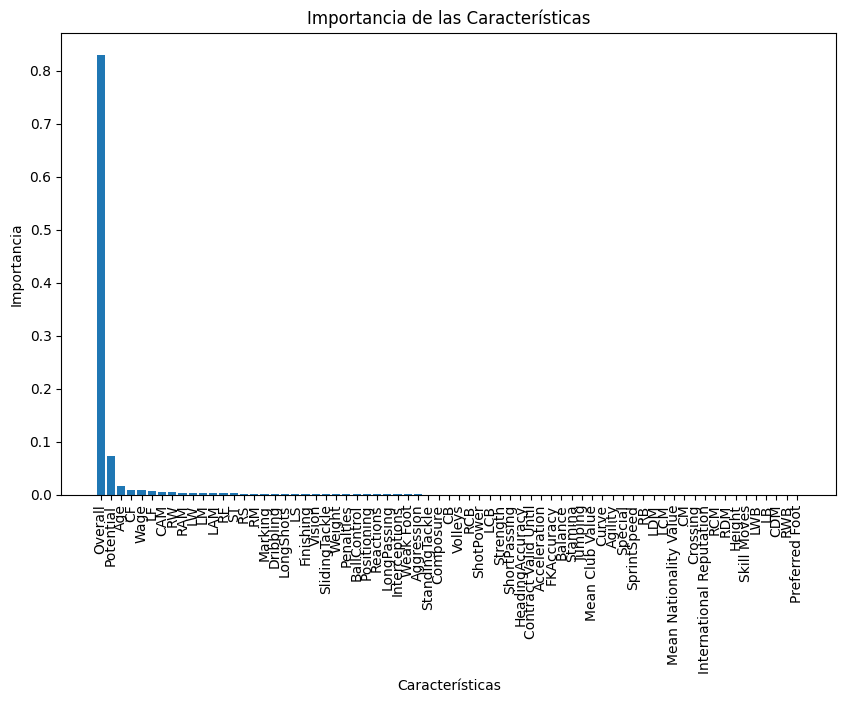

In [ ]:
# Visualizar la importancia de las características para cada modelo
plot_feature_importance(random_forest_model, X)

In [ ]:
X.columns.size

69

Ahora probemos eliminando aquellas con un impacto muy bajo (casi o igual a 0) para nuestro modelo.

En caso de no notar un bajón en la eficiencia podemos preferir aquel que sea más simple.

In [ ]:
def features_to_remove_below_importance_threshold(model, X, importance_threshold):
    importances = model.feature_importances_
    selected_feature_indices = [i for i, importance in enumerate(importances) if importance < importance_threshold]
    features_to_remove = X.columns[selected_feature_indices].tolist()
    return features_to_remove

In [ ]:
def preparation_process(df, columns_to_drop = []):
  # Carga de datos
  X, y = load_data(df, 'Value', columns_to_drop)

  # Separar valores de prueba y valores de entrenamiento
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

  # Entrenamiento y evaluación Random Forest
  print("Random Forest")
  random_forest_model = train_random_forest(X_train, y_train)
  evaluate_model(random_forest_model, X_test, y_test)

  plot_feature_importance(random_forest_model, X)

  return [X, y, X_train, X_test, y_train, y_test, random_forest_model]

Random Forest
Error absoluto medio (MAE): 121542.1329
Error cuadrático medio (MSE): 339892485356.9006
Porcentaje de predicciones dentro del margen de error del 10.0%: 90.47%


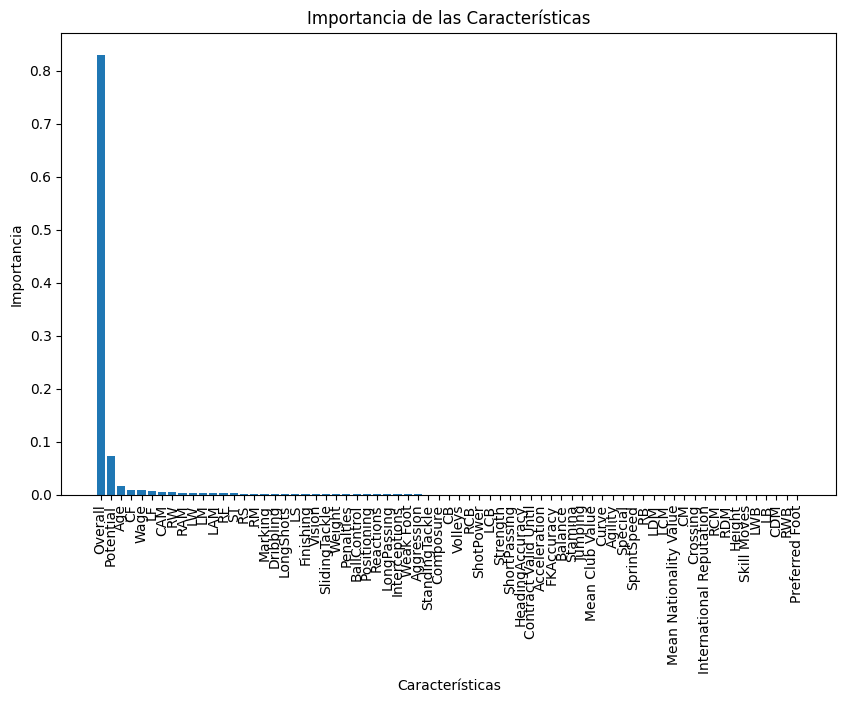

[        Age  Overall  Potential      Wage  Special  Preferred Foot  \
 0      31.0     94.0         94  565000.0     2202               0   
 1      33.0     94.0         94  405000.0     2228               1   
 2      26.0     92.0         93  290000.0     2143               1   
 3      27.0     91.0         92  355000.0     2281               1   
 4      27.0     91.0         91  340000.0     2142               1   
 ...     ...      ...        ...       ...      ...             ...   
 14738  19.0     47.0         65    1000.0     1307               1   
 14739  19.0     47.0         63    1000.0     1098               1   
 14740  16.0     47.0         67    1000.0     1189               1   
 14741  17.0     47.0         66    1000.0     1228               1   
 14742  16.0     46.0         66    1000.0     1321               1   
 
        International Reputation  Weak Foot  Skill Moves  Contract Valid Until  \
 0                           5.0        4.0          4.0        

In [ ]:
# Comprobación de que la función funciona retornando los mismo resultados iniciales
preparation_process(df, ['Release Clause'])

Ahora vamos a probar a remover características que no cumplan con un mínimo de importancia

In [ ]:
importance_threshold = 0.00001 # Por ejemplo, eliminar características con menos del X% de importancia
features_to_remove_dt = features_to_remove_below_importance_threshold(random_forest_model, X_train, importance_threshold)

In [ ]:
features_to_remove_dt.append('Release Clause')

Random Forest
Error absoluto medio (MAE): 121542.1329
Error cuadrático medio (MSE): 339892485356.9006
Porcentaje de predicciones dentro del margen de error del 10.0%: 90.47%


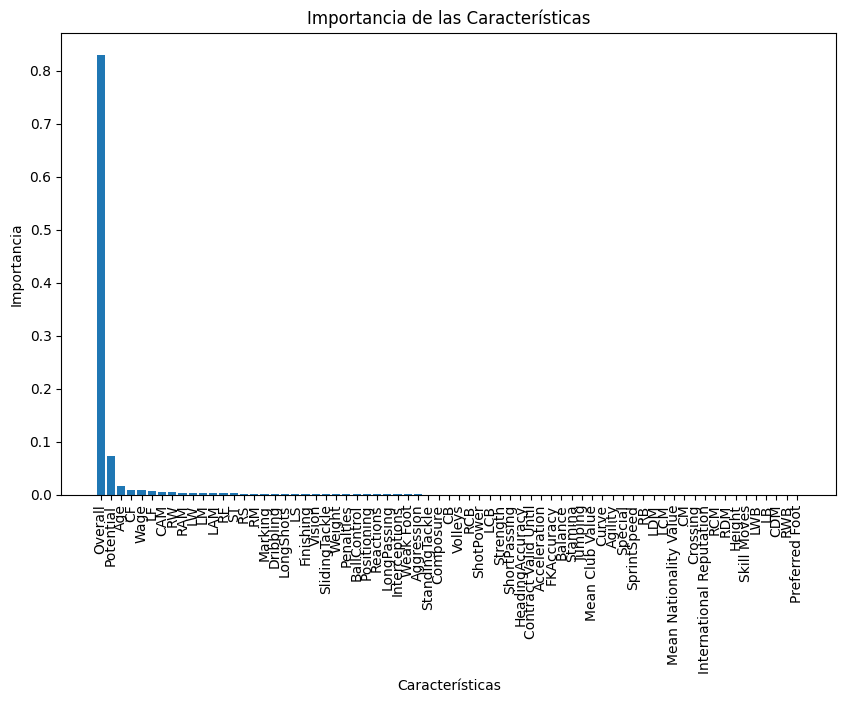

[        Age  Overall  Potential      Wage  Special  Preferred Foot  \
 0      31.0     94.0         94  565000.0     2202               0   
 1      33.0     94.0         94  405000.0     2228               1   
 2      26.0     92.0         93  290000.0     2143               1   
 3      27.0     91.0         92  355000.0     2281               1   
 4      27.0     91.0         91  340000.0     2142               1   
 ...     ...      ...        ...       ...      ...             ...   
 14738  19.0     47.0         65    1000.0     1307               1   
 14739  19.0     47.0         63    1000.0     1098               1   
 14740  16.0     47.0         67    1000.0     1189               1   
 14741  17.0     47.0         66    1000.0     1228               1   
 14742  16.0     46.0         66    1000.0     1321               1   
 
        International Reputation  Weak Foot  Skill Moves  Contract Valid Until  \
 0                           5.0        4.0          4.0        

In [ ]:
preparation_process(df, columns_to_drop = features_to_remove_dt)

Dejando todas las columnas (importance_threshold=0) -> 90.47%

Dejando solo aquellos que aportan >10% (importance_threshold=0.1)  -> 29.64%

Dejando solo aquellos que aportan >1% (importance_threshold=0.01) -> 56.46%

Dejando solo aquellos que aportan >0.1% (importance_threshold=0.001) -> 89.25%

Dejando solo aquellos que aportan >0.01% (importance_threshold=0.0001) -> 90.17%

Dejando solo aquellos que aportan >0.001% (importance_threshold=0.00001) -> 90.47%

Podemos notar que para 0.00001 es exactamente el mismo % que el del modelo original. Esto se debe a que es exactamente el mismo modelo, ya que para un importance threshhold tan bajo no elimina nada (Presenta un tiempo de 1 minuto aprox).

Esto plantea ciertas dudas en cuando a cual de los modelos Random Forest es más adecuado, ya que para los 3 mejores modelos:

90.47% -> 69 Columnas (Aprox 1 minuto para ejecutar preparation_process)

90.17% -> 66 Columnas (Aprox 40 segundos para ejecutar preparation_process)

89.25% -> 20 Columnas (Aprox 15 segundas para ejecutar preparation_process)

Random Forest
Error absoluto medio (MAE): 115063.9030
Error cuadrático medio (MSE): 316000962559.3422
Porcentaje de predicciones dentro del margen de error del 10.0%: 89.25%


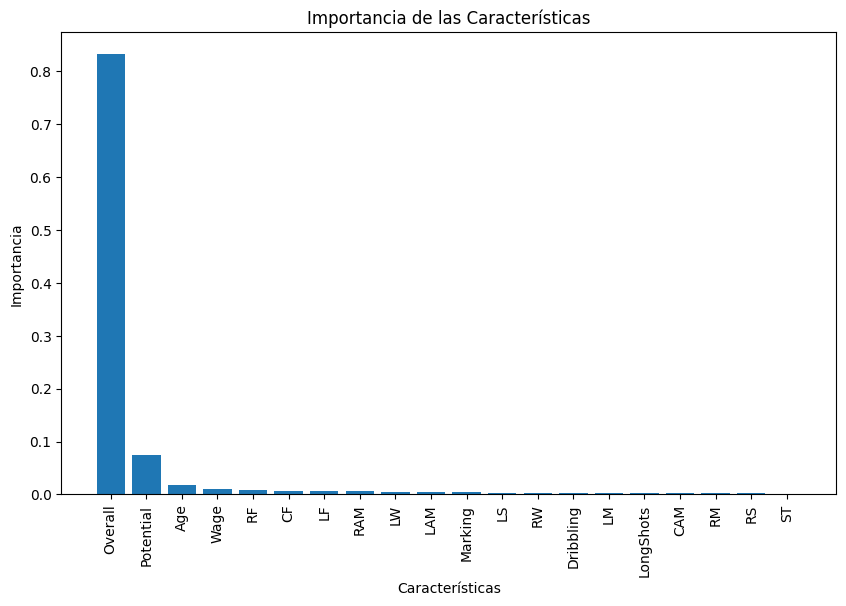

In [ ]:
importance_threshold = 0.001 # Por ejemplo, eliminar características con menos del X% de importancia
features_to_remove_dt = features_to_remove_below_importance_threshold(random_forest_model, X_train, importance_threshold)

features_to_remove_dt.append('Release Clause')

data = preparation_process(df, columns_to_drop = features_to_remove_dt)
X_r = data[0]
y_r = data[1]
X_train_r = data[2]
X_test_r = data[3]
y_train_r = data[4]
y_test_r = data[5]
reduced_model = data[6]

In [ ]:
X_r.columns.size

20

Finalmente, se decidió seguir trabajando con el modelo que presenta un 89,25% (con base en nuestra condición para determinar su validez). Esto debido a que, si bien presenta un porcentaje de acierto aproximadamente 1% menor, tambien presenta 49 columnas menos reduciendo muchísimo su complejidad; por lo que no consideramos que valga la pena esa complejidad extra para tan poca mejora

# Ajuste de hiperparámetros

Ahora buscaremos ajustar los hiperparámetros. Con esto buscamos alguna combinación de datos de entrada que presente el mejor resultado para nuestro modelo

## Búsqueda aleatoria

Tiempo de ejecución: 6 minutos

Mejores hiperparámetros: {'max_depth': 83, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}

Error absoluto medio (MAE): 120325.1191

Error cuadrático medio (MSE): 364694295828.1259

Porcentaje de predicciones dentro del margen de error del 10.0%: 89.05%

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

# Establecer semilla aleatoria
np.random.seed(13)

# Definir el modelo de Random Forest
reduced_model = RandomForestRegressor()

# Definir la distribución de hiperparámetros
param_dist = {
    'n_estimators': randint(10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(1, 100),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(reduced_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_absolute_error', random_state=13)
random_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
rs_random_forest_model = random_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mejores hiperparámetros: {'max_depth': 83, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}


In [ ]:
evaluate_model(rs_random_forest_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 120325.1191
Error cuadrático medio (MSE): 364694295828.1259
Porcentaje de predicciones dentro del margen de error del 10.0%: 89.05%


(120325.11910457344, 364694295828.1259, 89.04713462190573)

## Grid Search

Tiempo de ejecución: 1 hora 40 minutos aprox

(Reproducir bajo propio riesgo)

Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Error absoluto medio (MAE): 114770.3148

Error cuadrático medio (MSE): 310785694041.6972

Porcentaje de predicciones dentro del margen de error del 10.0%: 89.49%

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Establecer semilla aleatoria
np.random.seed(13)

# Definir el modelo de Random Forest
reduced_model = RandomForestRegressor()

# Definir la cuadrícula de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 150],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizar la búsqueda en rejilla
grid_search = GridSearchCV(reduced_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
grid_forest_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mejores hiperparámetros: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
evaluate_model(grid_forest_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 114770.3148
Error cuadrático medio (MSE): 310785694041.6972
Porcentaje de predicciones dentro del margen de error del 10.0%: 89.49%


(114770.31478458637, 310785694041.6972, 89.48796202102407)

## Bayesiana

Tiempo de ejecución: 21 minutos

Mejores hiperparámetros: OrderedDict([('max_depth', 50), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])

Error absoluto medio (MAE): 112729.3828

Error cuadrático medio (MSE): 281579823491.8616

Porcentaje de predicciones dentro del margen de error del 10.0%: 89.32%

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Establecer semilla aleatoria
np.random.seed(13)

# Definir el modelo de Random Forest
reduced_model = RandomForestRegressor()

# Definir el espacio de búsqueda de hiperparámetros
param_space = {
    'n_estimators': (10, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': (1, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

# Realizar la optimización bayesiana
bayes_search = BayesSearchCV(reduced_model, param_space, n_iter=30, cv=5, scoring='neg_mean_absolute_error', random_state=13)
bayes_search.fit(X_train_r, y_train_r)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", bayes_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
bayes_forest_model = bayes_search.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mejores hiperparámetros: OrderedDict([('max_depth', 50), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 200)])


In [ ]:
evaluate_model(bayes_forest_model, X_test_r, y_test_r)

Error absoluto medio (MAE): 112729.3828
Error cuadrático medio (MSE): 281579823491.8616
Porcentaje de predicciones dentro del margen de error del 10.0%: 89.32%


(112729.38284164123, 281579823491.86163, 89.31841302136317)

# Curva de aprendizaje

Tiempo de ejecución: 2 minutos

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_absolute_error', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizaje")
    plt.xlabel("Tamaño del Conjunto de Entrenamiento")
    plt.ylabel("Puntuación (MAE)")

    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Entrenamiento")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Validación")

    plt.legend(loc="best")
    plt.show()

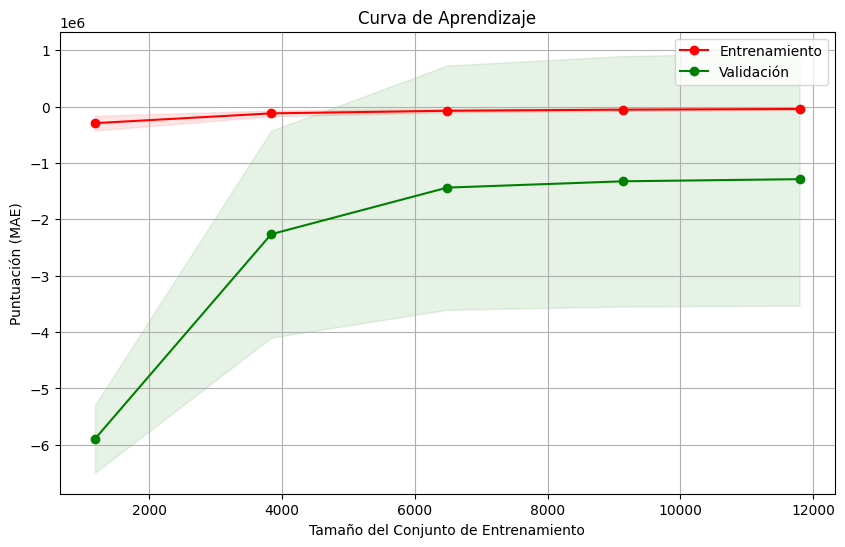

In [ ]:
plot_learning_curve(reduced_model, X_r, y_r, cv=5)


En la curva de aprendizaje, la línea de entrenamiento permanece relativamente estable, indicando que el modelo se ajusta bien a los datos de entrenamiento. La línea de validación aumenta inicialmente, alcanzando un punto de estabilización alrededor de 6000 o 7000, sugiriendo que agregar más datos ya no mejora significativamente la capacidad de generalización del modelo, de igual forma que pasa con la del decision tree.

# Análisis de residuos

Ahora vamos a realizar el análisis de residuos para evaluar la calidad de ajuste de nuestro modelo, de igual forma que hicimos con el decision tree. Este análisis nos ayudará a verificar si se cumplen los supuestos clave, como homocedasticidad y normalidad de los residuos, proporcionándonos información crucial sobre la validez y eficacia de nuestro modelo.

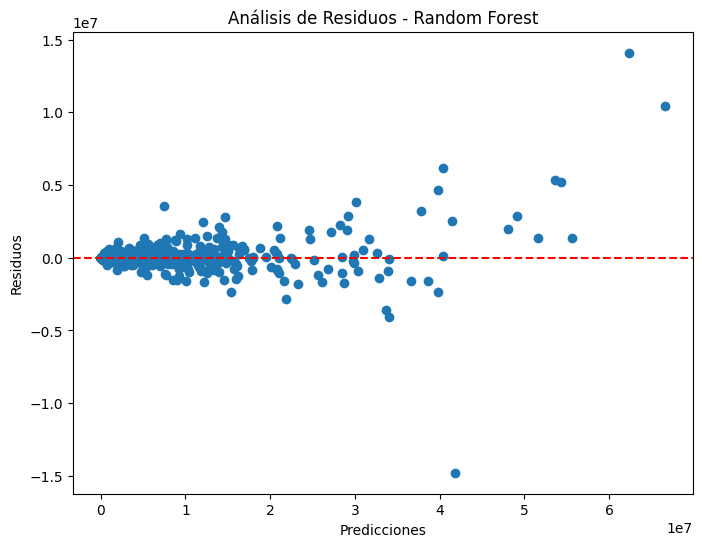

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score

# Ajusta tu modelo de Random Forest
modelo_rf = reduced_model
modelo_rf.fit(X_train_r, y_train_r)

# Realiza predicciones en el conjunto de prueba
predicciones_rf = modelo_rf.predict(X_test_r)

# Calcula los residuos
residuos_rf = y_test_r - predicciones_rf

# Scatter plot de residuos
plt.figure(figsize=(8, 6))
plt.scatter(predicciones_rf, residuos_rf)
plt.title('Análisis de Residuos - Random Forest')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='--')  # Línea horizontal en y=0
plt.show()


Tras examinar la relación entre los residuos y las predicciones en el análisis, se nota que la gran mayoría de los datos se agrupa alrededor del valor cero en el eje y, lo cual sugiere una concordancia adecuada con el supuesto de homocedasticidad. No obstante, la presencia de una forma de embudo a medida que avanzamos hacia la derecha indica una variabilidad ligeramente mayor en los residuos para ciertos intervalos de predicciones. Aunque hay señales de heterocedasticidad en esta porción reducida de datos, la homocedasticidad general del modelo parece ser aceptable. Este patrón es consistente con lo observado en el análisis de residuos del modelo de árbol de decisión, demostrando una tendencia similar en ambos casos.

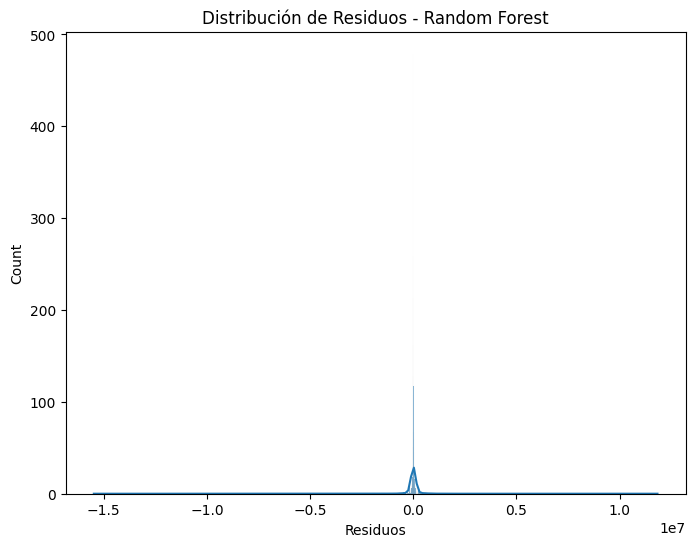

In [ ]:
# Histograma de residuos
plt.figure(figsize=(8, 6))
sns.histplot(residuos_rf, kde=True)
plt.title('Distribución de Residuos - Random Forest')
plt.xlabel('Residuos')
plt.show()


Una vez más, al examinar la segunda gráfica, se obtienen resultados similares al decision, aunque con una notable diferencia: el pico en la gráfica es menos pronunciado en comparación con el modelo de árbol de decisión. La forma general de la gráfica indica que el modelo en su mayoría realiza predicciones precisas pero puede ser importante realizar más investigaciones sobre los valores atípicos que contribuyen a ese pico menos acentuado en la gráfica.

De igual forma, parece presentar una distribución normal

In [ ]:
# Métricas de evaluación del modelo
mae_rf = mean_absolute_error(y_test_r, predicciones_rf)
r2_rf = r2_score(y_test_r, predicciones_rf)

print(f'Mean Absolute Error - Random Forest: {mae_rf}')
print(f'R-squared - Random Forest: {r2_rf}')

Mean Absolute Error - Random Forest: 113483.38419803324
R-squared - Random Forest: 0.9908513204296178


Los resultados obtenidos para el modelo de Random Forest muestran una mejora significativa en comparación con el modelo de árbol de decisión. Aquí está la comparación:

**Árbol de Decisión:**

*   MAE (Mean Absolute Error): 160,461.17
*   R2 (R-squared): 0.97397

**Random Forest:**
*   MAE (Mean Absolute Error): 113,483.38
*   R2 (R-squared): 0.99085

En comparación con el árbol de decisión, el modelo de Random Forest exhibe un menor error absoluto medio (MAE), lo cual es indicativo de una mayor precisión en las predicciones. Además, el coeficiente de determinación (R2) ha experimentado una mejora, alcanzando un valor más cercano a 1, lo que sugiere una capacidad significativamente mejor del modelo para explicar la variabilidad en los datos.

Estos resultados respaldan la elección del modelo de Random Forest sobre el árbol de decisión, ya que demuestra un rendimiento más robusto y preciso en la tarea de predicción.

# Observaciones finales

A la luz de las observaciones finales sobre el modelo de árbol de decisión, que destaca su rendimiento sólido y alineación con la métrica inicial de aceptación, las evaluaciones del modelo de Random Forest presentan resultados alentadores y mejorados.

El modelo de Random Forest muestra una significativa reducción en el Mean Absolute Error (MAE) en comparación con el árbol de decisión, indicando una mayor precisión en las predicciones. Asimismo, el coeficiente de determinación (R2) ha experimentado un incremento (+0.02), acercándose más a 1, lo cual sugiere una capacidad mejor para explicar la variabilidad en los datos.

Nuevamente se presentan las mismas limitaciones mencionadas para el árbol de decisión, donde se señaló la necesidad de pruebas adicionales con conjuntos de datos diferentes para evaluar la generalización y evitar posibles problemas de sobreajuste, el modelo de Random Forest ha demostrado ser más robusto y preciso.

En comparación, es importante destacar que el tiempo de ajuste de hiperparámetros para el modelo de árbol de decisión es significativamente menor, tomando alrededor de 1 minuto aproximadamente, en comparación con el modelo de Random Forest, que llegó a alcanzar tiempo de hasta 1 hora y 40 minutos como máximo. Aunque el árbol de decisión ofrece una ajuste más rápido, la elección entre ambos modelos implica sopesar la eficiencia computacional con el rendimiento predictivo, ya que el Random Forest, a pesar de su mayor tiempo de ajuste, ha demostrado un rendimiento superior en términos de precisión y generalización.

En resumen, el Random Forest parece ser una elección superior, superando al árbol de decisión tanto en términos de precisión quedando pendiente la medición en la capacidad de generalización. Estos resultados parciales parecen mostrar una preferencia por el modelo de Random Forest y resaltar su potencial para aplicaciones prácticas.